In [15]:
import pandas as pd
import quandl as q




In [16]:
q.ApiConfig.api_key = "SrZmwGYSGU6eFmsUs3k6"


In [17]:
#send a get request to query Microsoft's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019

msft_data = q.get("EOD/MSFT", start_date="2010-01-01", end_date="2018-01-01")


In [18]:
msft_data.tail()


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-21,86.05,86.1000,85.400,85.50,17990745.0,0.0,1.0,82.753184,82.801268,82.128087,82.224256,17990745.0
2017-12-22,85.40,85.6300,84.920,85.51,14145841.0,0.0,1.0,82.128087,82.349275,81.666477,82.233873,14145841.0
2017-12-26,85.31,85.5346,85.030,85.40,9891237.0,0.0,1.0,82.041535,82.257530,81.772263,82.128087,9891237.0
2017-12-27,85.65,85.9800,85.215,85.71,14678025.0,0.0,1.0,82.368509,82.685866,81.950175,82.426210,14678025.0
2017-12-28,85.90,85.9300,85.550,85.72,10594344.0,0.0,1.0,82.608931,82.637781,82.272340,82.435827,10594344.0


In [19]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2013-09-03 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


In [20]:
msft_data.describe()


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.0,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,52.584746,52.995410,52.178964,52.617352,3.185689e+07,0.005303,1.0,48.313918,48.689674,47.942436,48.343758,3.185689e+07
std,12.834439,12.866606,12.784332,12.832792,1.709372e+07,0.042538,0.0,13.355876,13.396753,13.298865,13.355366,1.709372e+07
min,31.100000,31.390000,30.950000,31.152000,7.425603e+06,0.000000,1.0,26.784964,27.034727,26.655776,26.829749,7.425603e+06
25%,42.955000,43.265000,42.612500,43.058750,2.185425e+07,0.000000,1.0,38.271893,38.738265,37.897188,38.426534,2.185425e+07
50%,49.535000,50.105000,49.120000,49.690000,2.808245e+07,0.000000,1.0,45.556134,46.075295,45.082764,45.713932,2.808245e+07
75%,60.640000,61.130000,60.241250,60.637500,3.624615e+07,0.000000,1.0,56.864784,57.394297,56.647558,57.007230,3.624615e+07
max,87.120000,87.499900,86.230000,86.850000,2.025224e+08,0.420000,1.0,83.782189,84.147534,82.926287,83.522533,2.025224e+08


In [21]:
# Import numpy package
import numpy as np


In [22]:
# assign `Adj Close` to `daily_close`
daily_close = msft_data[['Adj_Close']]
# returns as fractional change
daily_return = daily_close.pct_change()
# replacing NA values with 0
daily_return.fillna(0, inplace=True)
print(daily_return)


            Adj_Close
Date                 
2013-09-03   0.000000
2013-09-04  -0.021487
2013-09-05   0.001282
2013-09-06  -0.002657
2013-09-09   0.016147
...               ...
2017-12-21  -0.000234
2017-12-22   0.000117
2017-12-26  -0.001286
2017-12-27   0.003630
2017-12-28   0.000117

[1090 rows x 1 columns]


In [23]:
mdata = msft_data.resample('M').apply(lambda x: x[-1])

monthly_return = mdata.pct_change()
monthly_return

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-31,0.080606,0.071450,0.080734,0.063852,0.046256,NaN,0.0,0.080606,0.071450,0.080734,0.063852,0.046256
2013-11-30,0.060572,0.072850,0.070175,0.076967,-0.470029,NaN,0.0,0.068655,0.081026,0.078331,0.085174,-0.470029
2013-12-31,-0.011105,-0.018543,-0.015944,-0.018883,-0.207642,NaN,0.0,-0.011105,-0.018543,-0.015944,-0.018883,-0.207642
2014-01-31,-0.012032,0.008249,-0.017653,0.011494,4.322496,NaN,0.0,-0.012032,0.008249,-0.017653,0.011494,4.322496
2014-02-28,0.027876,0.015044,0.034464,0.012421,-0.557600,NaN,0.0,0.035567,0.022639,0.042204,0.019996,-0.557600
2014-03-31,0.064508,0.079043,0.068218,0.069956,0.137603,NaN,0.0,0.064508,0.079043,0.068218,0.069956,0.137603
2014-04-30,-0.000742,-0.024096,-0.005696,-0.014394,-0.243730,NaN,0.0,-0.000742,-0.024096,-0.005696,-0.014394,-0.243730
2014-05-31,0.001238,0.011605,0.001994,0.013366,-0.025131,NaN,0.0,0.008173,0.018613,0.008935,0.020386,-0.025131


In [24]:
# assigning adjusted closing prices to 

adj_price = msft_data['Adj_Close']
adj_price

Date
2013-09-03    27.456741
2013-09-04    26.866783
2013-09-05    26.901233
2013-09-06    26.829749
2013-09-09    27.262960
                ...    
2017-12-21    82.224256
2017-12-22    82.233873
2017-12-26    82.128087
2017-12-27    82.426210
2017-12-28    82.435827
Name: Adj_Close, Length: 1090, dtype: float64

In [25]:
# calculate the moving average
mav = adj_price.rolling(window=50).mean()


In [26]:
# print the result
print(mav[-10:])


Date
2017-12-14    78.370727
2017-12-15    78.587349
2017-12-18    78.794357
2017-12-19    78.985236
2017-12-20    79.170153
2017-12-21    79.352198
2017-12-22    79.521039
2017-12-26    79.680683
2017-12-27    79.843228
2017-12-28    80.007114
Name: Adj_Close, dtype: float64


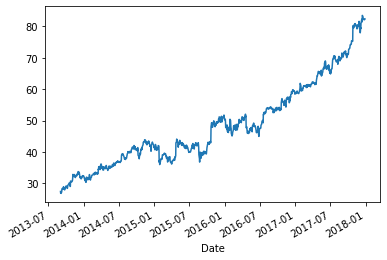

In [27]:
# import the matplotlib package to see the plot

import matplotlib.pyplot as plt

adj_price.plot()


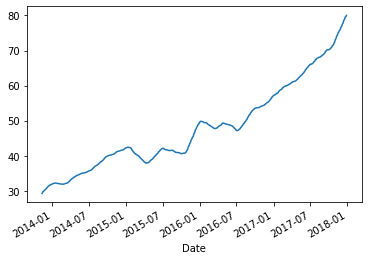

In [28]:
mav.plot()


In [29]:
# step1: initialize the short and long lookback periods

short_lb = 50
long_lb = 120


In [30]:
# step2: initialize a new DataFrame called signal_df with a signal column

signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0


In [31]:
# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = msft_data['Adj_Close'].rolling(window=short_lb,                                     min_periods=1, center=False).mean()


In [32]:
# step4: create long simple moving average over the long lookback period

signal_df['long_mav'] = msft_data['Adj_Close'].rolling(window=long_lb, min_periods=1, center=False).mean()


In [33]:
# step5: generate the signals based on the conditional statement

signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)   


In [34]:
# step6: create the trading orders based on the positions column

signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]


,signal,short_mav,long_mav,positions
Date,,,,
2015-02-09,0.0,41.052710,41.067391,-1.0
2015-09-18,0.0,40.906332,40.927386,-1.0
2016-03-21,0.0,47.803481,47.845893,-1.0
2016-06-10,0.0,48.481641,48.510179,-1.0


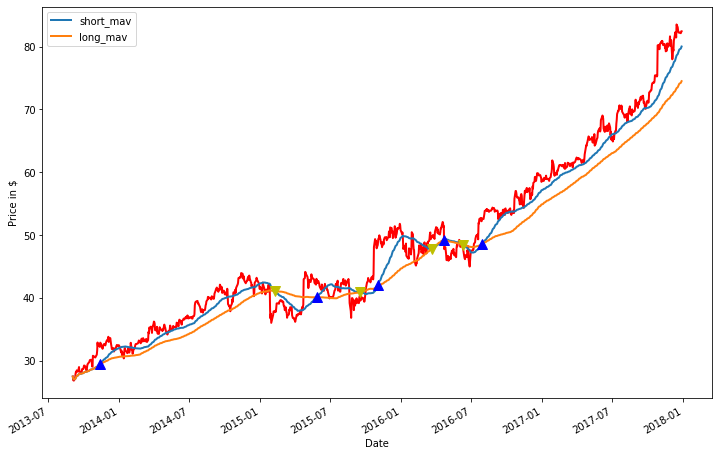

In [35]:
# initialize the plot using plt
fig = plt.figure()
# Add a subplot and label for y-axis

plt1 = fig.add_subplot(111,  ylabel='Price in $')
msft_data['Adj_Close'].plot(ax=plt1, color='r', lw=2.)

# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))

# plotting the sell signals

plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,signal_df.short_mav[signal_df.positions == -1.0],'v',markersize=10, color='y')

# plotting the buy signals

plt1.plot(signal_df.loc[signal_df.positions == 1.0].index,signal_df.short_mav[signal_df.positions == 1.0],'^', markersize=10, color='b')         
# Show the plotplt.show()

